# Project 2: Automobile price predictions

## BY AIKANSHI 

### DS20NOV01

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df= pd.read_csv('AutoData.csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape,df.size

((205, 25), 5125)

### BASIC EDA 

In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### Showing no null values as above

### - Performing data cleanup as required


In [6]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
## Converting symboling into a category 

df['symboling'].astype('category')
df['symboling'].dtype

dtype('int64')

In [8]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
## Since as per given data for symboling
## A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe

#### Most of the cars lie under symboling value of 0, 1, 2

In [10]:
df['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [11]:
df['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

## Describing all parameters using appropriate plots or graphs

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


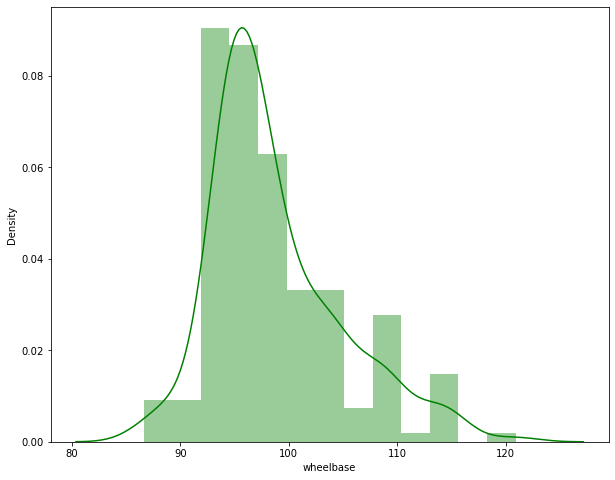

In [12]:
plt.figure(figsize = (10, 8))
sns.distplot(df['wheelbase'], color='green');


C:\Users\aikan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


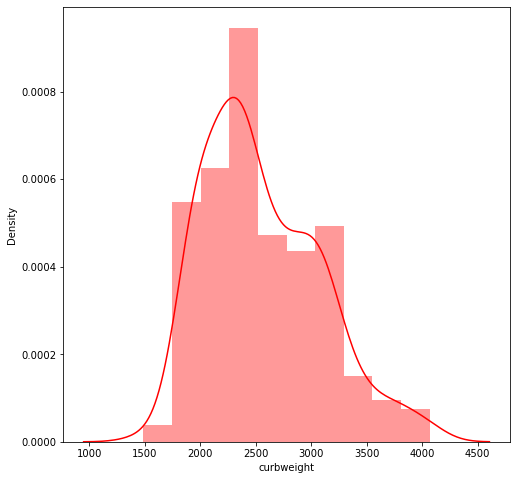

In [13]:
# curbweight: weight of car without occupants or baggage


plt.figure(figsize = (8,8))
sns.distplot(df['curbweight'], color='red');

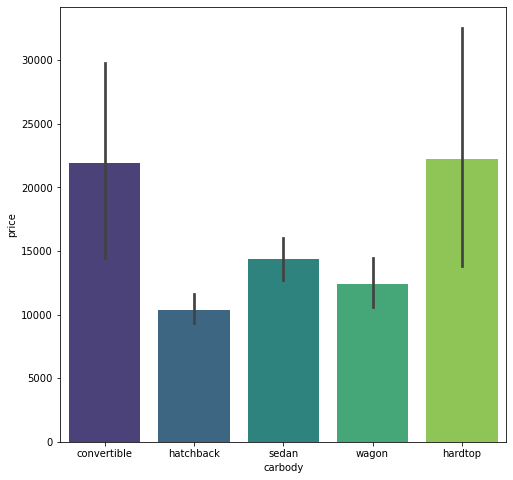

In [14]:
# carbody: Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.


plt.figure(figsize = (8,8))
sns.barplot(x="carbody", y="price", data=df, palette="viridis");

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


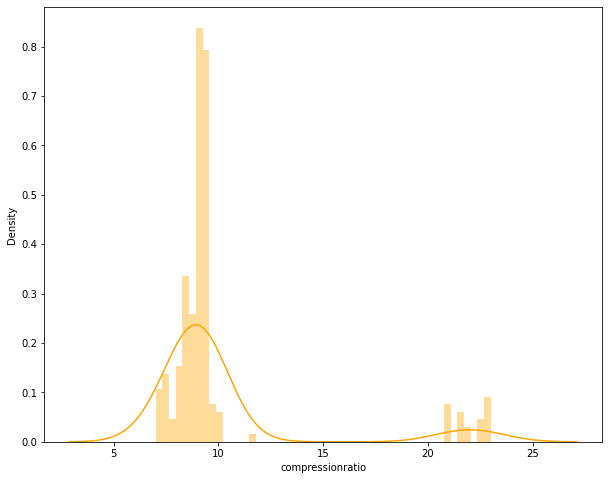

In [15]:
# compression ratio: It is ratio of volume of compression chamber at the largest capacity to least capacity


plt.figure(figsize = (10,8))
sns.distplot(df['compressionratio'], color='orange');

In [16]:
#Mileage can be calculated taking the weighted average of 55% of city and 45% of  highways.


df['mileage'] =df['citympg']*0.55 + df['highwaympg']*0.45

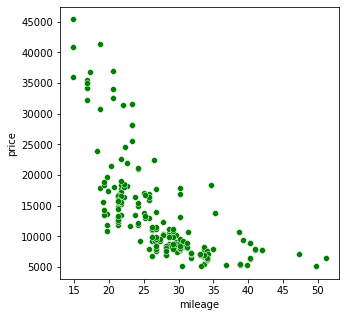

In [17]:
# Let's see how price varies with mileage.
## mileage : Mileage has a negative correlation with price.


plt.figure(figsize = (5,5))
sns.scatterplot(x = 'mileage', y = 'price', data =df,color= 'green');


In [18]:
# Describing names of cars

df.make.values[0:50]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)', 'bmw 320i', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'bmw x3', 'chevrolet impala',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic',
       'honda civic cvcc', 'honda civic', 'honda accord cvcc',
       'honda civic cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda accord', 'honda civic', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'isuzu D-Max ', 'jaguar xj',
       'jaguar xf', 'jaguar xk'], dtype=object)

### Pick the best variable for making a simple linear regression model

In [19]:
## Since car name consist of both cAR company and car model. so we need to split them and make a new column for brand
df['brand'] = df.make.str.split(' ').str.get(0).str.upper()
df['brand']

0      ALFA-ROMERO
1      ALFA-ROMERO
2      ALFA-ROMERO
3             AUDI
4             AUDI
          ...     
200          VOLVO
201          VOLVO
202          VOLVO
203          VOLVO
204          VOLVO
Name: brand, Length: 205, dtype: object

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


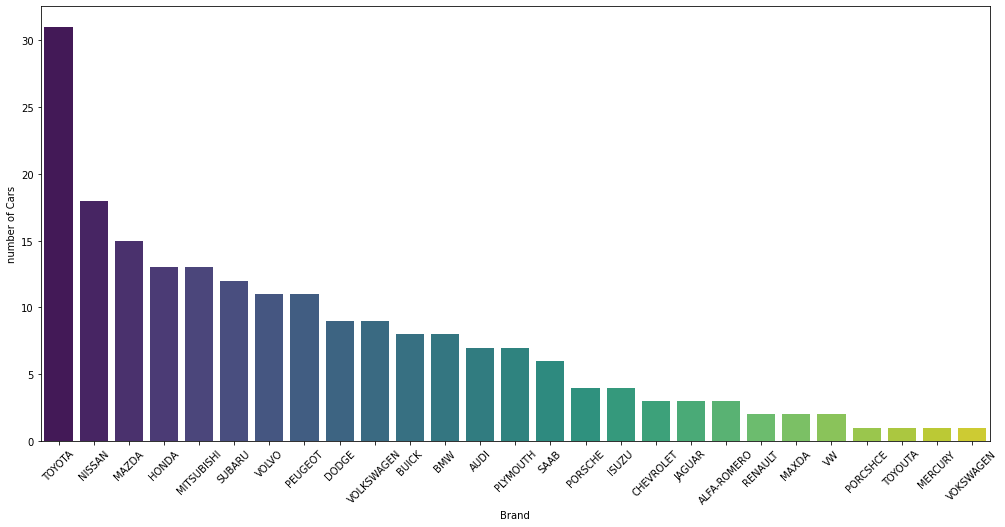

<Figure size 432x288 with 0 Axes>

In [20]:
## Checking the name of all companies and their respective number of models

fig, ax = plt.subplots(figsize = (17,8))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index, palette = 'viridis')
plt1.set(xlabel = 'Brand', ylabel= 'number of Cars')
plt.xticks(rotation = 45)
plt.show()
plt.tight_layout()

In [21]:
# As per the data VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW. Also, PORSCHE as PORSCHE and PORCSCHE.



df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')

In [22]:
df.brand.describe()

count        205
unique        24
top       TOYOTA
freq          31
Name: brand, dtype: object

##### Hence we concluded that toyota has the highest number of models

##### Checking average car price company wise



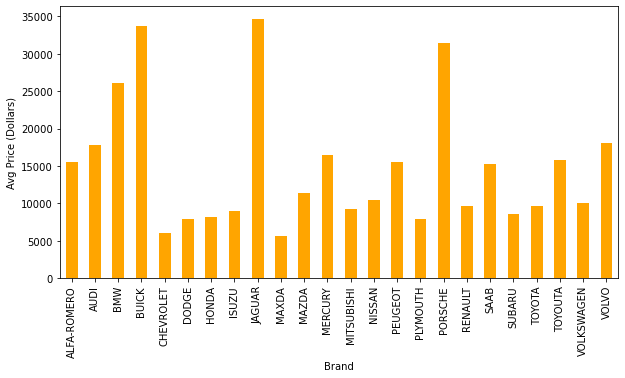

In [23]:
df_comp_avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (10,5), color='orange')
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

In [24]:
## Comparing the aVERAGES prices


df = df.merge(df_comp_avg_price, on = 'brand')
df['brand_category'] =df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))
df['brand_category'].head

<bound method NDFrame.head of 0      Mid_Range
1      Mid_Range
2      Mid_Range
3      Mid_Range
4      Mid_Range
         ...    
200    Mid_Range
201    Mid_Range
202    Mid_Range
203    Mid_Range
204    Mid_Range
Name: brand_category, Length: 205, dtype: object>

### Lets now categorise brands on the basis of Budget, Mid-Ranges, Luxury on basis of their average prices

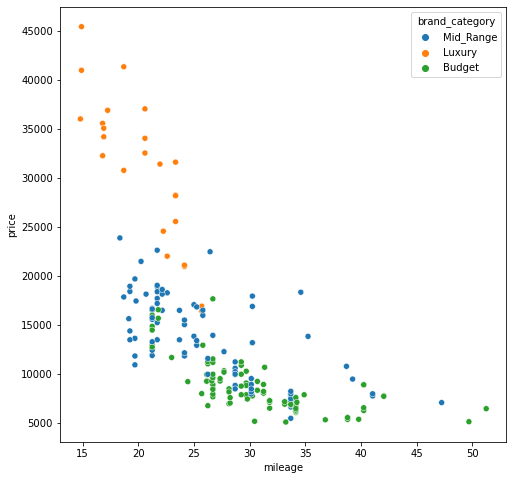

In [25]:
# Brand Category - Mileage : It is expected that luxury brands don't care about mileage. 


plt.figure(figsize = (8,8))
sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = df);

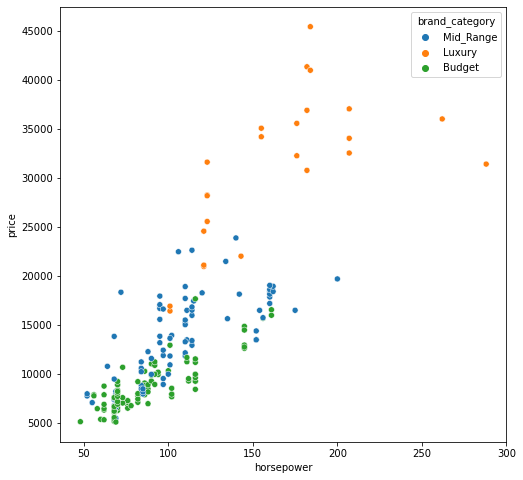

In [26]:
# Brand Category vs Horsepower : It is expected that luxury brands have more horse power. 


plt.figure(figsize = (8,8))
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = df);

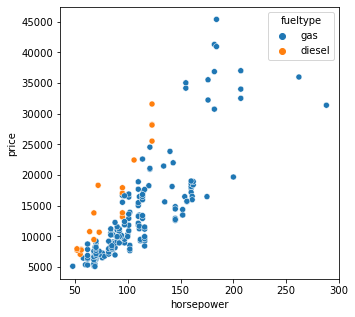

In [27]:
### # Horsepower - fuel type 
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df);

#### SInce we have the target variable as the PRICE OF CARS

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


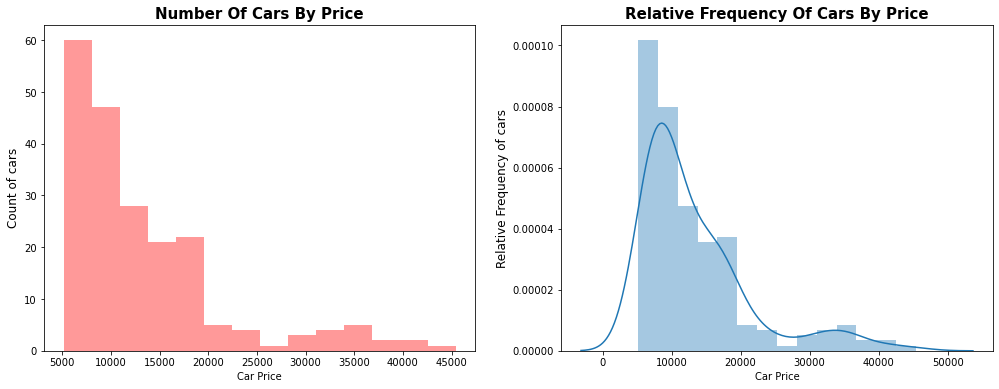

In [28]:
fig, ax= plt.subplots(1,2,figsize=(17,6))

sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='red')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Number Of Cars By Price',size=15,weight="bold")

sns.distplot(df['price'], kde=True, ax=ax[1])
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Relative Frequency Of Cars By Price',size=15,weight="bold");

### Price:

##### 1 More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. So around 85% of cars in US market are priced between 5,000 to 20,000.


##### 2.it has positive skew, however majority of the cars are low priced.


###### 3.Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve


### Linear model pre-requisites

#### To perform linear regression, the target variable should be linearly related to independent variables. 
#### Let's see whether that's true in this case.

In [29]:
Numerical= df.select_dtypes(include=['int64', 'float64'])
Numerical

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand_avg_price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,15498.333333
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,15498.333333
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,15498.333333
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,17859.166714
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,25.25,18063.181818
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,21.70,18063.181818
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,20.25,18063.181818
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,26.45,18063.181818


### Bivariate pairplot

#### we can use pairplot to check the linearity with target variable

<Figure size 1440x720 with 0 Axes>

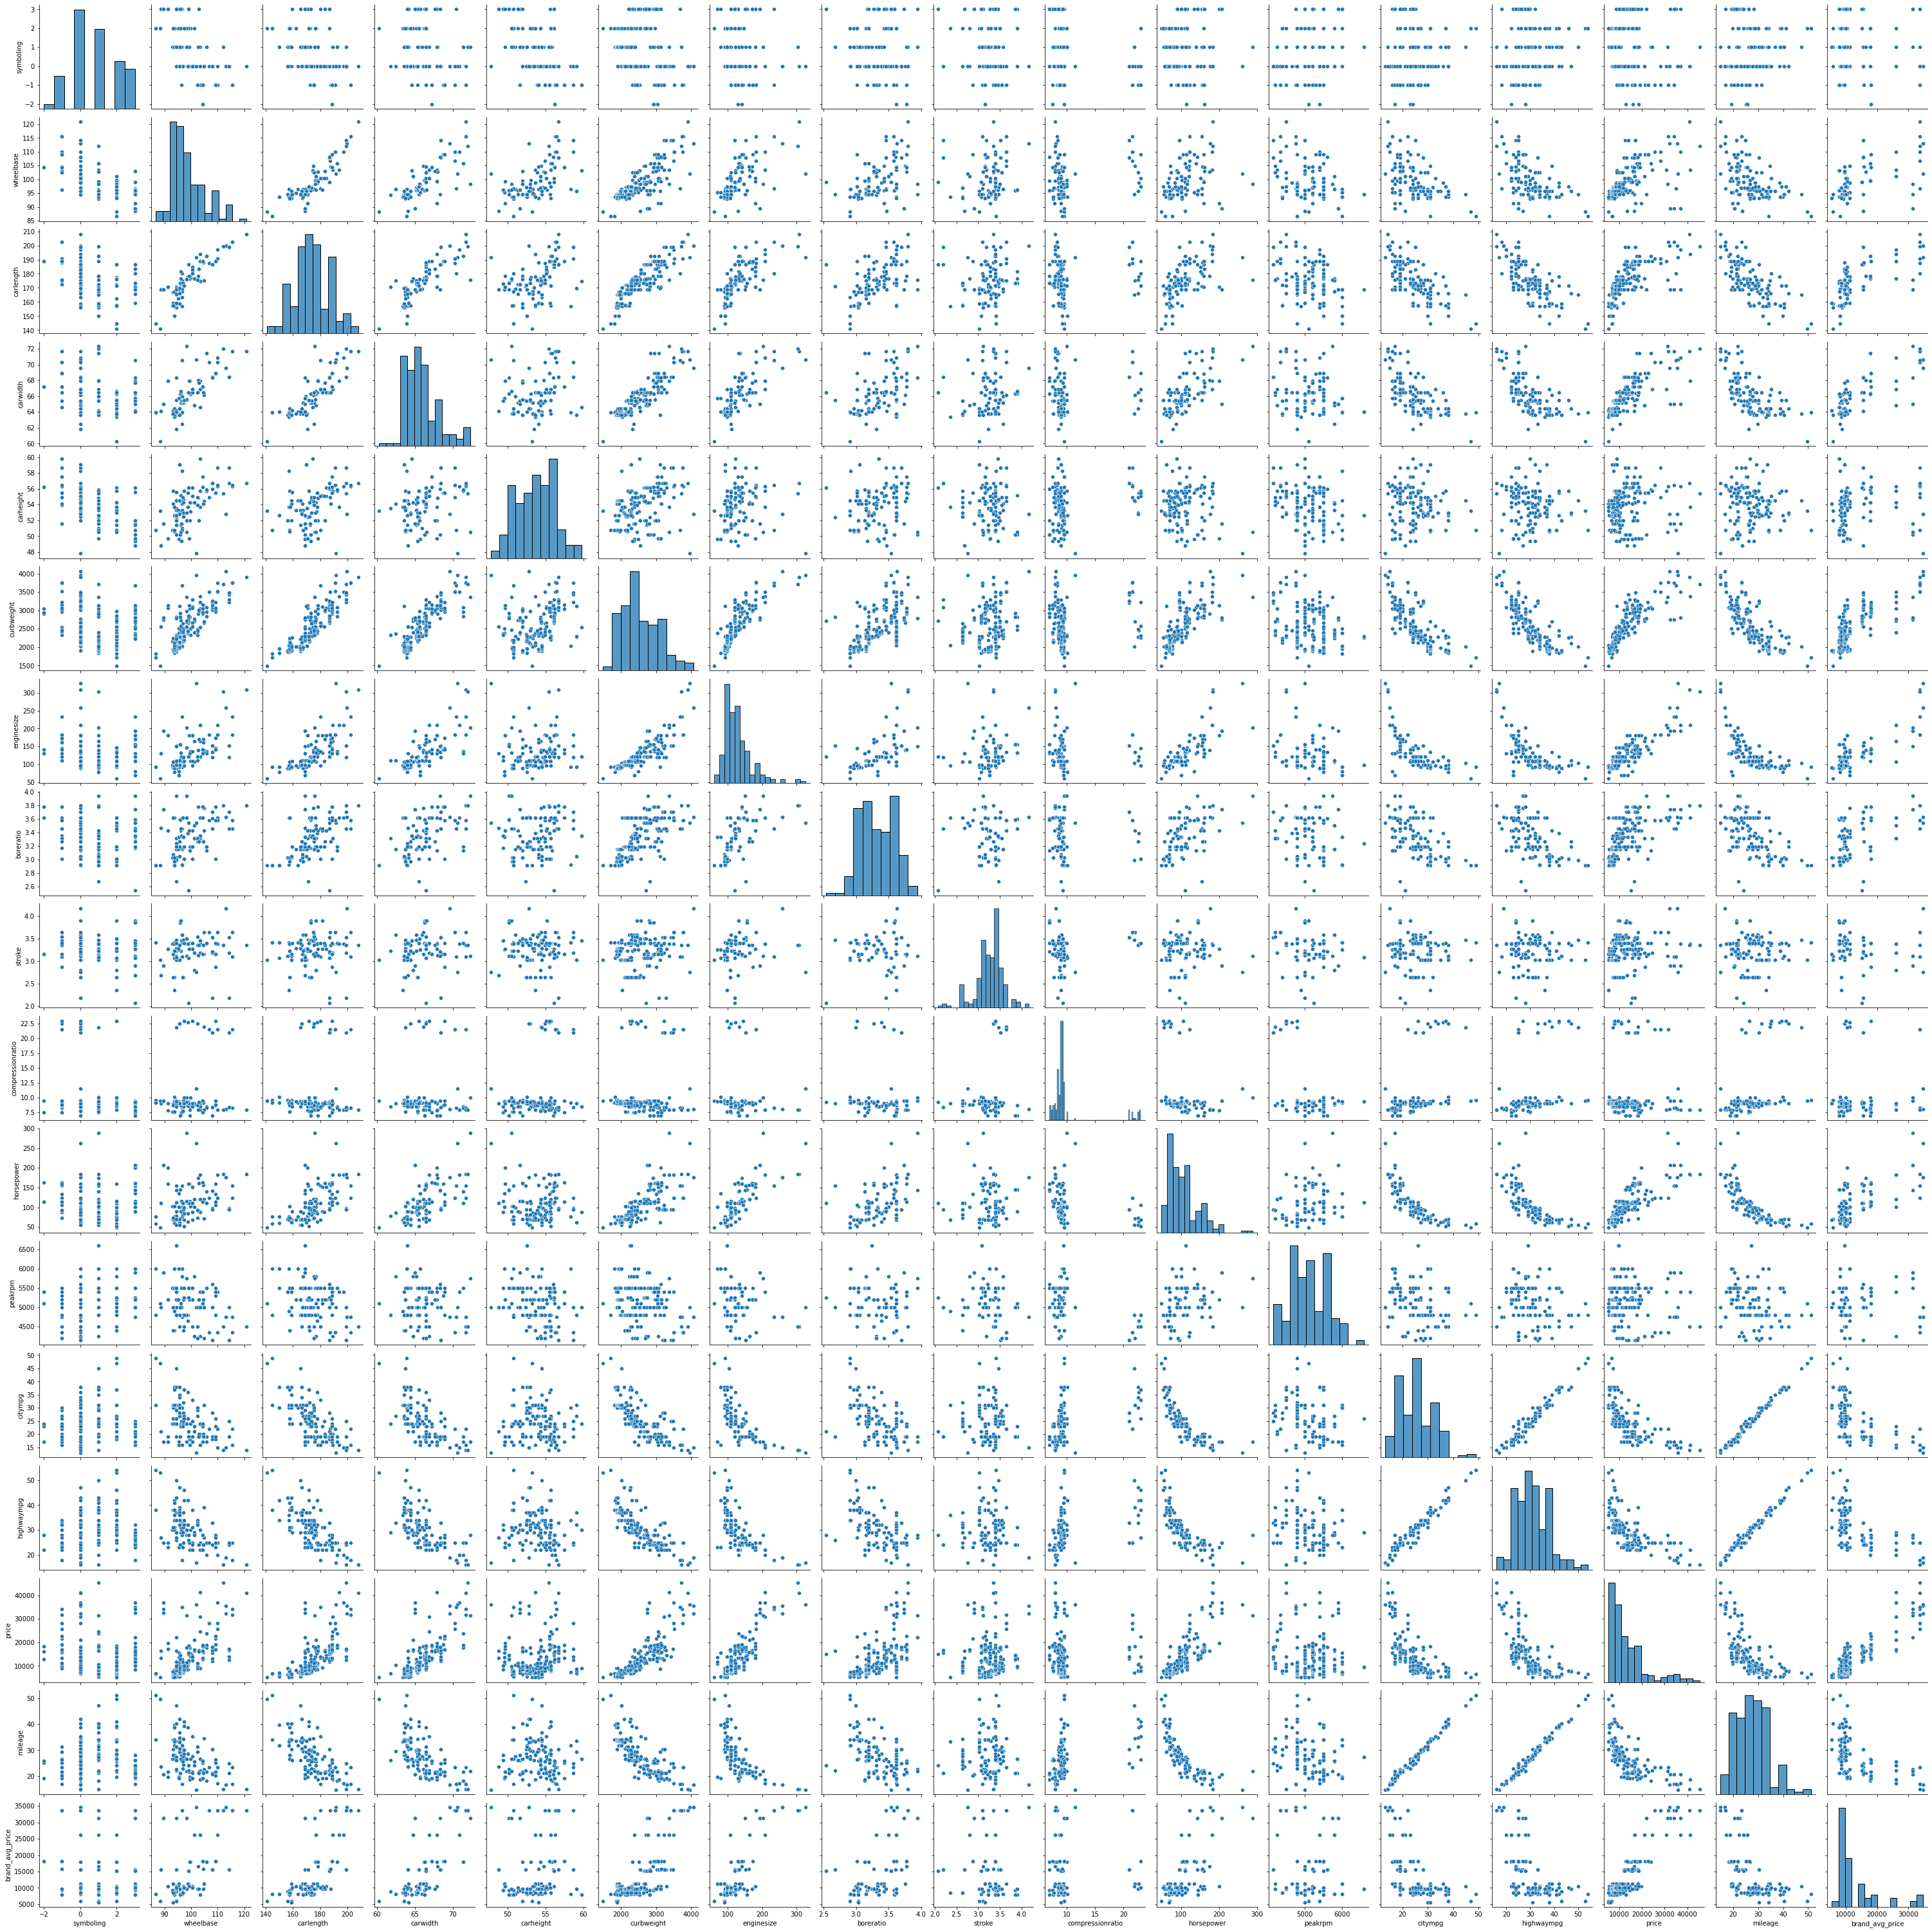

In [30]:
plt.figure(figsize=(20, 10))
sns.pairplot(Numerical);

#### Since above is not an economical and relevant method. WE can try visualizing all numerical variable with target variable ie price

<ipython-input-31-736517c1ad2e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


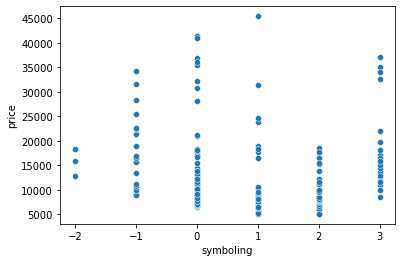

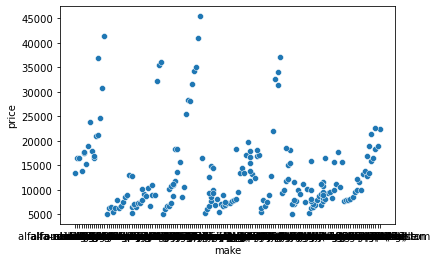

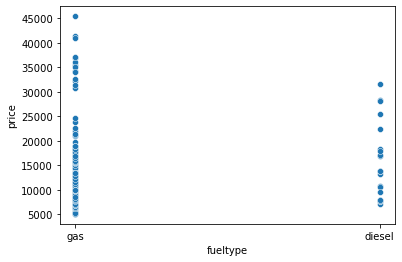

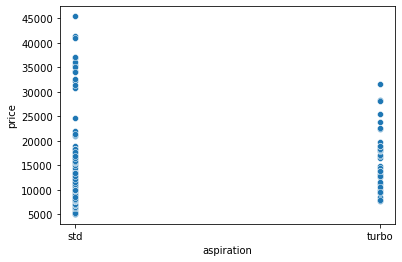

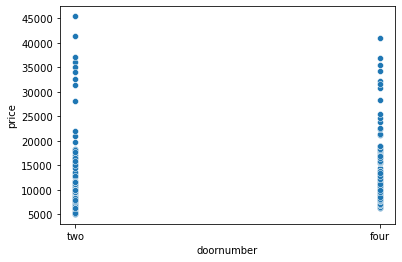

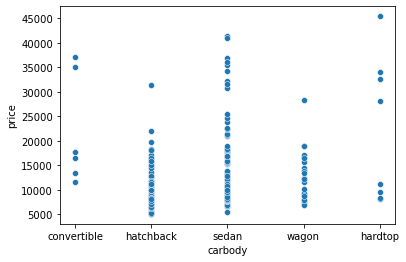

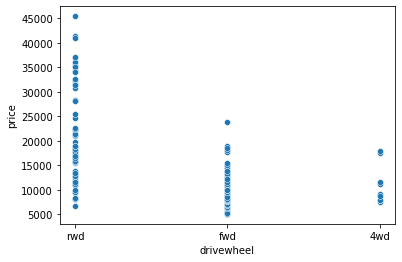

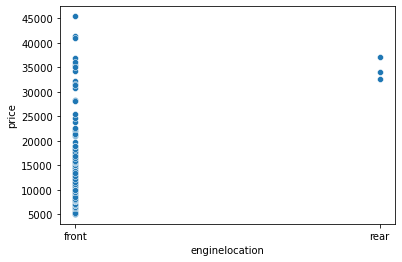

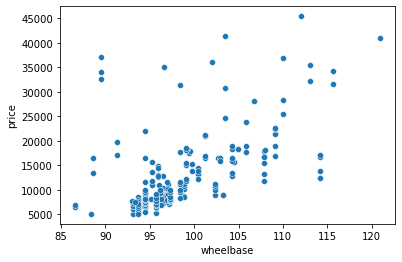

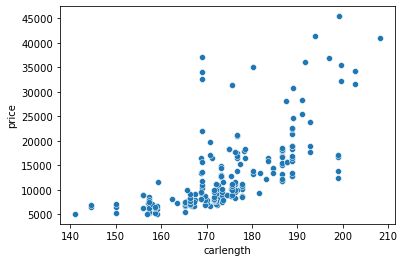

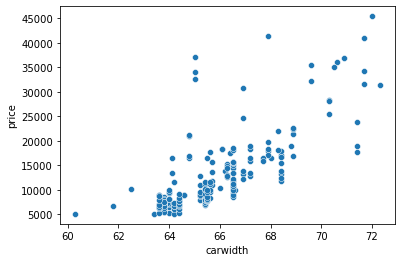

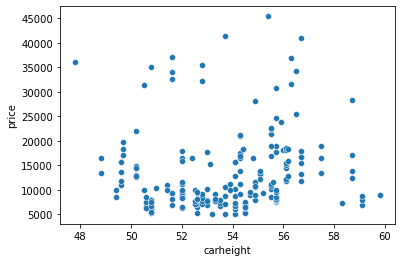

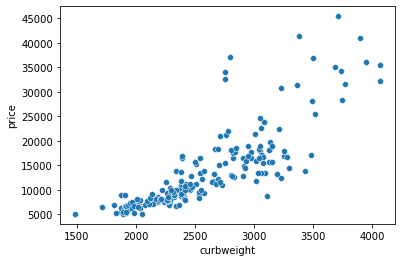

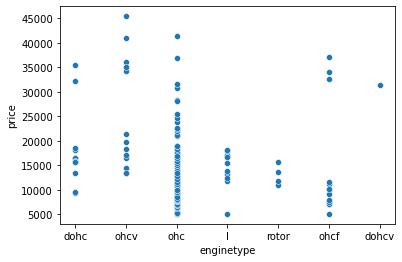

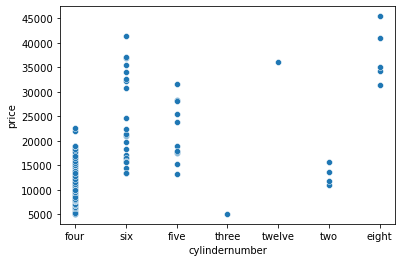

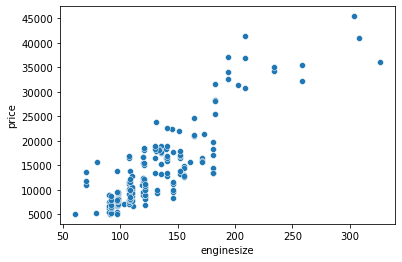

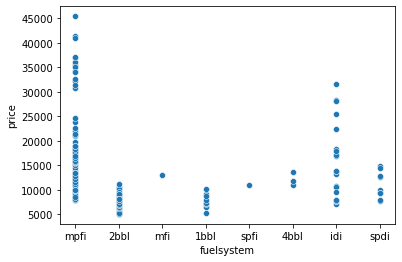

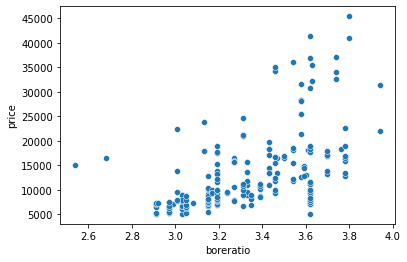

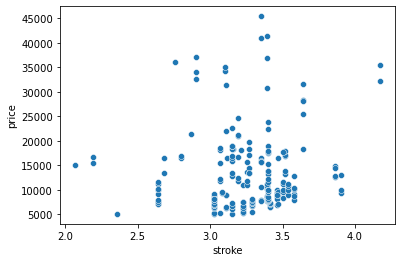

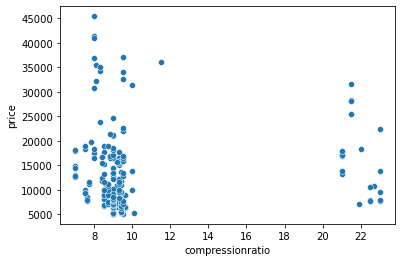

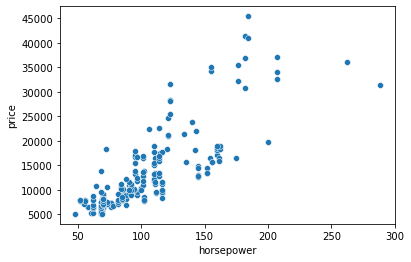

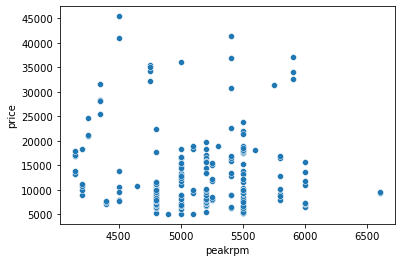

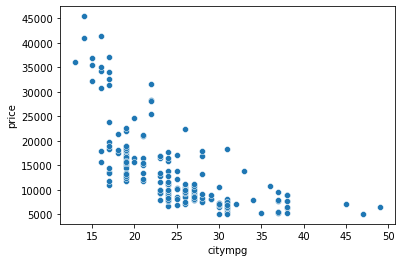

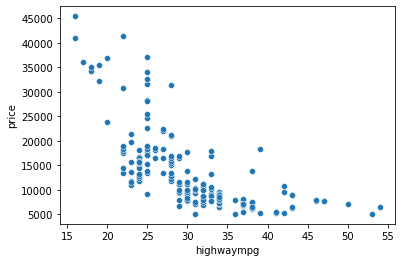

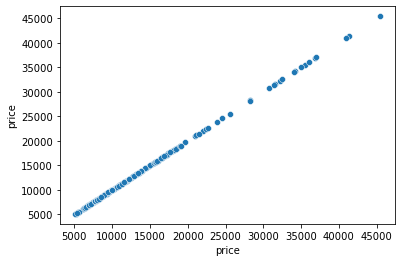

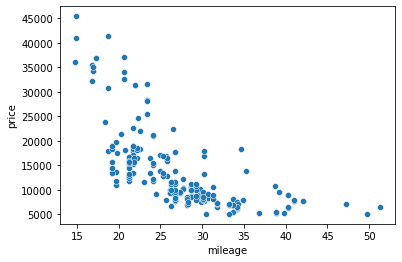

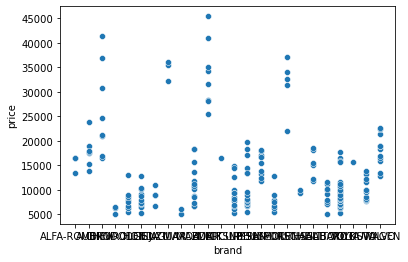

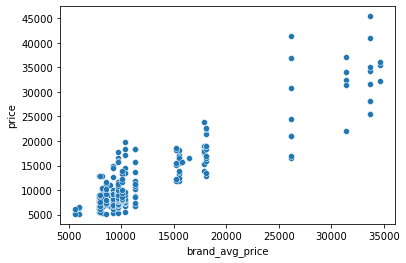

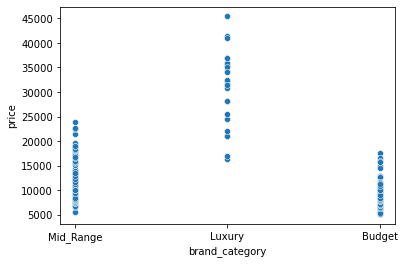

In [31]:
for i, col in enumerate (df.columns):
    plt.figure(i)
    sns.scatterplot(x=df[col],y=df['price'])

### As per the above plots, following columns are having linear relation with target variable.

#### Horsepower, enginesize, carwidth, curbweight, boreration & carwidth

## Correlation for resultant data

<AxesSubplot:>

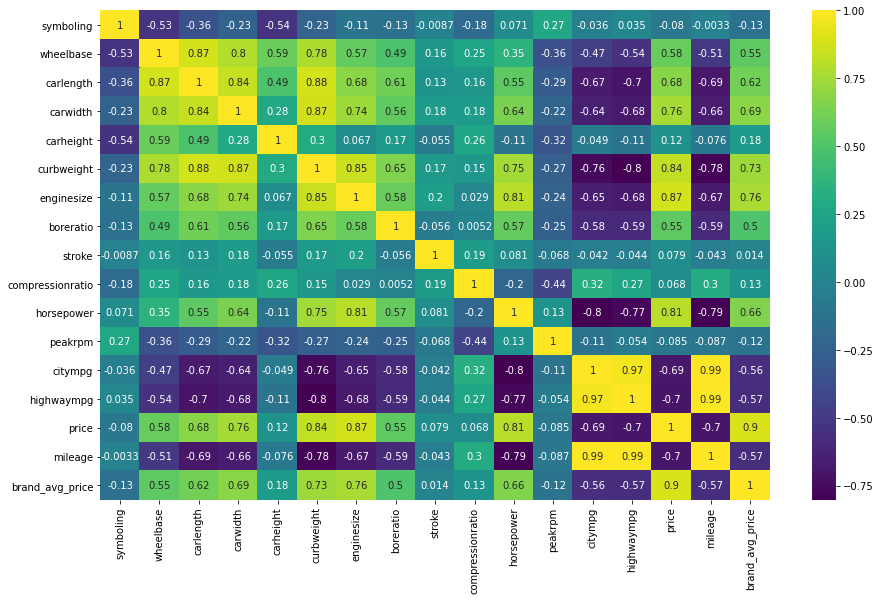

In [32]:
corr=df.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap="viridis")

## Some useful points on basis of above correlation data

### 1. Dependent var and independent variables

#####  Positive correlation: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables represent the size/weight/engine power of the car)

##### Negative correlation: Price is negatively corr with mpg var's citympg and highwaympg. 
##### Hence cars with high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg

### 2. Variable affecting target response

##### Highly correlated variables are 'carsize','curbweight', 'Horsepower', 'enginesize'

## Data Preparation: : Feature engineering


In [33]:
## Since y is targeted variable ie price

y = df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [34]:
x= df.drop(columns=['price'])
x

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,mileage,brand,brand_avg_price,brand_category
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,23.70,ALFA-ROMERO,15498.333333,Mid_Range
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,23.70,ALFA-ROMERO,15498.333333,Mid_Range
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,22.15,ALFA-ROMERO,15498.333333,Mid_Range
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,26.70,AUDI,17859.166714,Mid_Range
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,19.80,AUDI,17859.166714,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,25.25,VOLVO,18063.181818,Mid_Range
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,21.70,VOLVO,18063.181818,Mid_Range
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,20.25,VOLVO,18063.181818,Mid_Range
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,26.45,VOLVO,18063.181818,Mid_Range


In [35]:
# creating dummy variables for categorical variables

catagorical = x.select_dtypes(include=['object'])
catagorical

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,brand_category
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,ALFA-ROMERO,Mid_Range
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,ALFA-ROMERO,Mid_Range
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,ALFA-ROMERO,Mid_Range
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,AUDI,Mid_Range
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,AUDI,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,VOLVO,Mid_Range
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,VOLVO,Mid_Range
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,VOLVO,Mid_Range
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,VOLVO,Mid_Range


In [36]:
### creating dummy variables


cars_dummies = pd.get_dummies(catagorical, drop_first=True)
cars_dummies.head()

,make_alfa-romero Quadrifoglio,make_alfa-romero giulia,make_alfa-romero stelvio,make_audi 100 ls,make_audi 100ls,make_audi 4000,make_audi 5000,make_audi 5000s (diesel),make_audi fox,make_bmw 320i,...,brand_PORSCHE,brand_RENAULT,brand_SAAB,brand_SUBARU,brand_TOYOTA,brand_TOYOUTA,brand_VOLKSWAGEN,brand_VOLVO,brand_category_Luxury,brand_category_Mid_Range
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
 x=x.drop(columns=catagorical)
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,mileage,brand_avg_price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,15498.333333
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,15498.333333
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,22.15,15498.333333
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,26.70,17859.166714
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,19.80,17859.166714


In [38]:
dfx=pd.merge(x,cars_dummies,on=x.index)
dfx.drop(columns='key_0',inplace=True)


### SCALING AND FITTING MODEL

In [40]:

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
columns=dfx.columns
dfx_scaled=pd.DataFrame(scale(dfx))
dfx_scaled.columns=columns
dfx_scaled.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       ...
       'brand_PORSCHE', 'brand_RENAULT', 'brand_SAAB', 'brand_SUBARU',
       'brand_TOYOTA', 'brand_TOYOUTA', 'brand_VOLKSWAGEN', 'brand_VOLVO',
       'brand_category_Luxury', 'brand_category_Mid_Range'],
      dtype='object', length=216)

In [41]:
dfx_scaled.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,brand_PORSCHE,brand_RENAULT,brand_SAAB,brand_SUBARU,brand_TOYOTA,brand_TOYOUTA,brand_VOLKSWAGEN,brand_VOLVO,brand_category_Luxury,brand_category_Mid_Range
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,5.848980e-17,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,...,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-3.991387e-16,-8.732852e-17,-6.452833e-16,3.552714e-16,-4.137612e-16,-4.115949e-17
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.281433e+00,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,...,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.220911e-01,-7.001400e-02,-2.493515e-01,-2.381198e-01,-3.641383e-01,-8.416254e-01
25%,-6.714717e-01,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,...,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.220911e-01,-7.001400e-02,-2.493515e-01,-2.381198e-01,-3.641383e-01,-8.416254e-01
50%,1.335090e-01,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,...,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.220911e-01,-7.001400e-02,-2.493515e-01,-2.381198e-01,-3.641383e-01,-8.416254e-01
75%,9.384897e-01,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,...,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.220911e-01,-7.001400e-02,-2.493515e-01,-2.381198e-01,-3.641383e-01,1.188177e+00
max,1.743470e+00,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,...,6.324555e+00,1.007472e+01,5.759051e+00,4.010403e+00,2.369157e+00,1.428286e+01,4.010403e+00,4.199567e+00,2.746210e+00,1.188177e+00


In [46]:
# split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfx_scaled, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=50)

### Building  of model and feature selection

In [47]:

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)

y_pred_test=lm.predict(x_test)
y_pred_train=lm.predict(x_train)

In [48]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-square on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-square on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-square on train data: 0.9986348635374969
R-square on test data: -3.6428579105050307e+25
RMSE on train data: 302.49283067385124
RMSE on test data: 4.097937329747587e+16


### Feature selection

In [58]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4,12)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 12):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(x_train, y_train)

    # selecting features selected by rfe_n
    col_n = x_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    x_train_rfe_n = x_train[col_n]
    x_test_rfe_n = x_test[col_n]


    # add a constant to the model
    x_train_rfe_n = sm.add_constant(x_train_rfe_n)


    x_test_rfe_n = sm.add_constant(x_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, x_train_rfe_n).fit()
    
    # # Making predictions
    y_pred_test = lm_n.predict(x_test_rfe_n)
    y_pred_train = lm_n.predict(x_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    
    

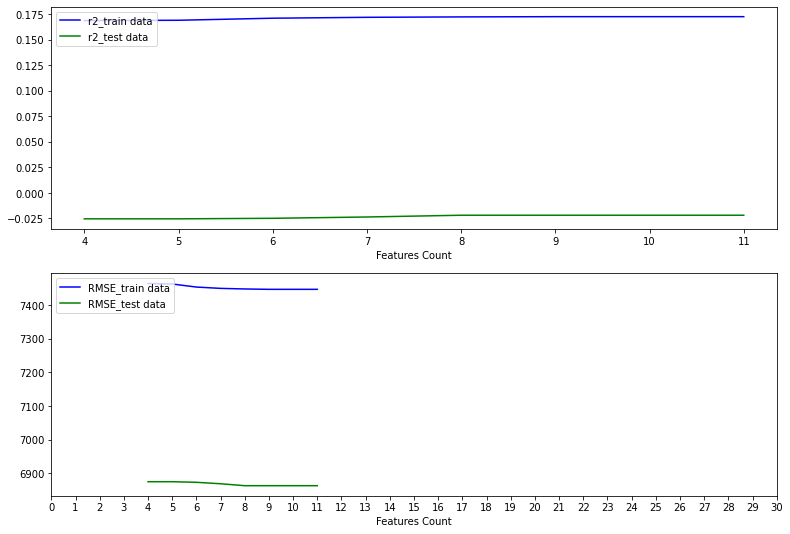

In [59]:
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)                                                                #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))                                          #method 2 of ticks

plt.show()

### From the above graphs we find:
##### R square for test data peaks at 13 features and at this point model generalises well as train R2 is v close to test. 
##### Train R2 keep on increasing beyond 13 features but R2 keeps increasing as you add more features to train data. We have select number of features where model accuracy and generalization both are at satisfactory level.

#####  RMSE for test data is lowest at 13 features and beyond that it increases. 
##### Train RMSE at 13 also looks good, adding more features to train decreases RMSE but again there is always a trade off between removing features (aka reducing complexity) and model performance. So we will go with 13 features.



In [65]:
lm=LinearRegression()
rfe=RFE(lm,12)
rfe.fit(x_train,y_train)

col=x_train.columns[rfe.support_] #obtaining feature names of 12 most imp 


#making new Df's with  12 most imp features as per RFE algorithm
x_train_13= x_train[col]
x_test_13 = x_test[col]


# add a constant to the model
x_train_13 = sm.add_constant(x_train_13,has_constant='add')
x_test_13 = sm.add_constant(x_test_13,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,x_train_13).fit()


#making predictions
y_pred_train=lm_sm.predict(x_train_13)
y_pred_test=lm_sm.predict(x_test_13)


#evlaution metrics

#R-square
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('---R-square---')
print("R-square for test data is {}".format(test_r2))
print("R-square for train data is {}".format(train_r2))


print('--STANDARD ERROR/RMSE---')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())

C:\Users\aikan\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


---R-square---
R-square for test data is -21.436815053221213
R-square for train data is 0.17265010886484367
--STANDARD ERROR/RMSE---
RMSE for test data is 6863.544376314148
RMSE for train data is 7446.833772307342
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.571
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           0.000468
Time:                        16:50:08   Log-Likelihood:                -1694.9
No. Observations:                 164   AIC:                             3410.
Df Residuals:                     154   BIC:                             3441.
Df Model:                           9                                         
Covariance Type:            nonrobust                                      

Text(0.5, 0, 'Index')

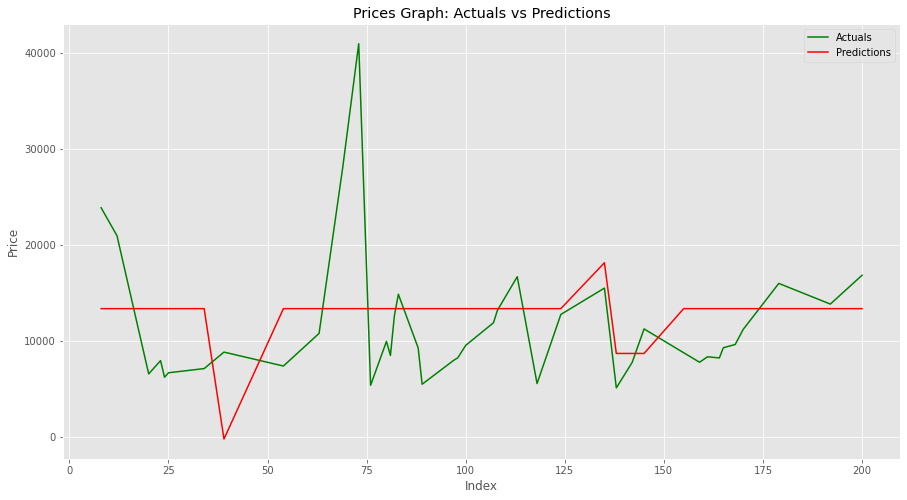

In [63]:
 plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,8))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='green',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Prices Graph: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')